# Individual Planning Report

## Project: Predicting Newsletter Subscription Based on Player Demographics

This report is a planning proposal for a data science project using data collected from UBC's MineCraft server. The goal is to investigate whether player data collected can predict whether someone will subscribe to a game-related newsletter.

## 1. Data Description
This project uses 2 datasets collected from UBC's MineCraft server:
- **players.csv**: Contains one row per player, each row contains demographic information as well as whether the player is subscribed to the newsletter.
- **sessions.csv**: Contains one row per play-session, each row contains a hashed email for the player, as well as start and end times of the session.

It is important to note that if necessary, players could be linked to their individual sessions by using their hashed email, which is a variable present in both datasets.

In order to understand the data, both datasets will be previewed and explained, before summary statistics are calculated. The first dataset will be the players.csv set, which contains player data.


In [1]:
library(tidyverse)

players <- read_csv("Data/players.csv")

head(players, n = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


As shown above, there are **196** observations across **7** variables. 
- **experience**: This is a character variable that has 5 different options, based on the player's experience on playing Minecraft
- **subscribe**: This is a logical variable that depends on whether the player has subscribed to the newsletter
- **hashedEmail**: A character variable that gives an encoded version of the player's email
- **played_hours**: A double variable that gives the total number of time the player spent playing the game
- **name**: A character variable that gives the player's name
- **gender**: A character variable that gives the player's gender
- **age**: A double variable that gives the player's age

Now, summary statistics will be calculated for the dataframe:

In [2]:
players_factor <- players |>
  #Converts non numerical variables to factors so percentages can be calculated
  mutate(experience = factor(experience),
    gender = factor(gender),
    subscribe = factor(subscribe)
        )
#Summarise to calculate summary statistics for age and hours played
age_summary <- players_factor |>
    summarise(mean_age = round(mean(Age, na.rm = TRUE), 2),
              median_age = median(Age, na.rm = TRUE),
              min_age = min(Age, na.rm = TRUE),
              max_age = max(Age, na.rm = TRUE)
              )
age_summary
hours_summary <- players_factor |>
    summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
            median_played_hours = median(played_hours, na.rm = TRUE),
            min_played_hours = min(played_hours, na.rm = TRUE),
            max_played_hours = max(played_hours, na.rm = TRUE)
             )

hours_summary

#Percentages for gender, experience and subscribed
gender_pct <- players_factor |>
  count(gender) |>
  mutate(percentage = round(n / sum(n) * 100, 2))|>
  rename(number = n)

experience_pct <- players_factor |>
  count(experience) |>
  mutate(percentage = round(n / sum(n) * 100, 2))|>
  rename(number = n)

subscribe_pct <- players_factor |>
  count(subscribe) |>
  mutate(percentage = round(n / sum(n) * 100, 2))|>
  rename(number = n)

gender_pct
experience_pct
subscribe_pct

mean_age,median_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,9,58


mean_played_hours,median_played_hours,min_played_hours,max_played_hours
<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,0,223.1


gender,number,percentage
<fct>,<int>,<dbl>
Agender,2,1.02
Female,37,18.88
Male,124,63.27
Non-binary,15,7.65
Other,1,0.51
Prefer not to say,11,5.61
Two-Spirited,6,3.06


experience,number,percentage
<fct>,<int>,<dbl>
Amateur,63,32.14
Beginner,35,17.86
Pro,14,7.14
Regular,36,18.37
Veteran,48,24.49


subscribe,number,percentage
<fct>,<int>,<dbl>
FALSE,52,26.53
TRUE,144,73.47


Now, the same process will be applied to the sessions.csv dataset, which outlines each individual session played on MineCraft.

In [4]:
sessions <- read_csv("Data/sessions.csv")

head(n = 10,sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


There are **1535** observations and **5** variables for this dataset.
- **hashedEmail**: As in the players dataset, hashed email is a character variable that gives an encoded version of the player's email
- **start_time**: A character representation of the date (dd/mm/yy) and time (hh/mm) the player started the play session
- **end_time**: A character representation of the date (dd/mm/yy) and time (hh/mm) the player ended the play session
- **original_start_time**: A double representation of the amount of milliseconds from January 1st, 1970 to when the session was started
- **original_end_time**: A double representation of the amount of milliseconds from January 1st, 1970 to when the session was ended

Once again, summary statistics will be calculated, these statistics will be focused on the length of each session:

In [5]:
library(lubridate)

#advice on how to convert using lubridate taken from here:
#https://www.r-bloggers.com/2024/09/mastering-date-and-time-data-in-r-with-lubridate/
sessions_summary <- sessions |>
  mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time),
    session_minutes = as.numeric(end_time - start_time)
  )|>
summarise(
    mean_minutes = round(mean(session_minutes, na.rm = TRUE), 2),
    median_minutes = round(median(session_minutes, na.rm = TRUE), 2),
    min_minutes = round(min(session_minutes, na.rm = TRUE ), 2),
    max_minutes = round(max(session_minutes, na.rm = TRUE ), 2)
    )

sessions_summary


mean_minutes,median_minutes,min_minutes,max_minutes
<dbl>,<dbl>,<dbl>,<dbl>
50.86,30,3,259


**Limitations**

Based on the two datasets, it is clear that while they are very useful, they do have some limitations. For example, there are many N/A values in both sets, meaning that in order to predict values accurately, methods such as mean imputation will have to be used. Additionally, there may have been some biases in collecting the data, based on the fact that it was targeted at other university students, as shown in the mean and median ages. This means that any results found in this study may be correct for UBC students and their tendencies, but not for the general population that includes a variety of ages. Neverthless, this study should provide important data on whether a person will subscribe to a game-related newsletter based on their demographics. 

## 2. Questions
The broad question that will be answered is: **"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**

Narrowing this down, the specific question that looks to be answered is: **"Can gender and experience level predict whether a player will subscribe to a gaming newsletter?"**

To answer this question, the players.csv dataset will be used to explore whether trends exist between demographic characteristics and newsletter subscription status. Since Players.csv already has all of the variables required, multiple visualizations can be performed to explore any relationships or trends that exist. To start, however, some surface-level wrangling will have to be done, such as selecting the relevant columns, accounting for N/A values and ensuring that both predictor variables are factors. A classification model will then be made based on the clean dataset, in order to be able to predict whether a new player will subscribe to the newsletter. 

## 3. Exploratory Data Analysis and Visualization

As shown in part 1, summary statistics were calculated for the majority of the variables. The minimum wrangling was also done, such as converting to factors and accounting for N/A values. This section focuses on visualizing the data, and finding any potential trends that may be present between variables of interest.

There will be three visualizations made in this section. The first two will be relevant to the question asked, and the third one will provide insight on age distribution for subscribers. 

The first graph will be focused on the proportion of genders who are subscribed. A stacked bar plot will be used:

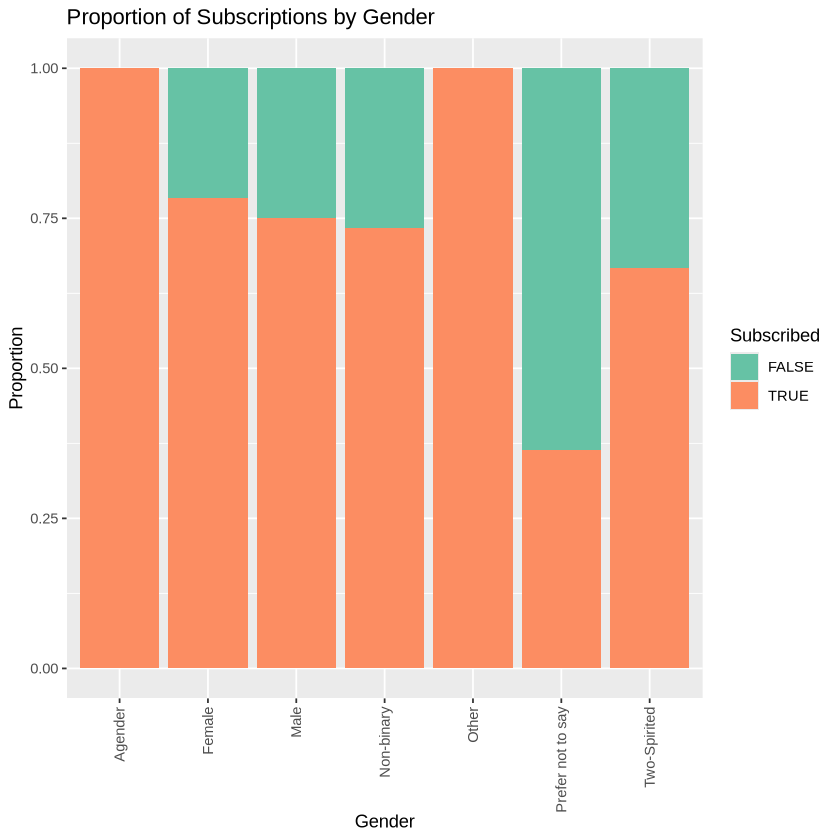

In [19]:
gender_prop <- ggplot(players_factor, aes(x = gender, fill = subscribe)) +
  geom_bar(position = "fill") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Proportion of Subscriptions by Gender",
       x = "Gender",
       y = "Proportion",
       fill = "Subscribed")+
  #Vertical labels taken from https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

gender_prop

Now, a graph will be made on the proportion of different gaming experiences that are subscribed to the newsletter.

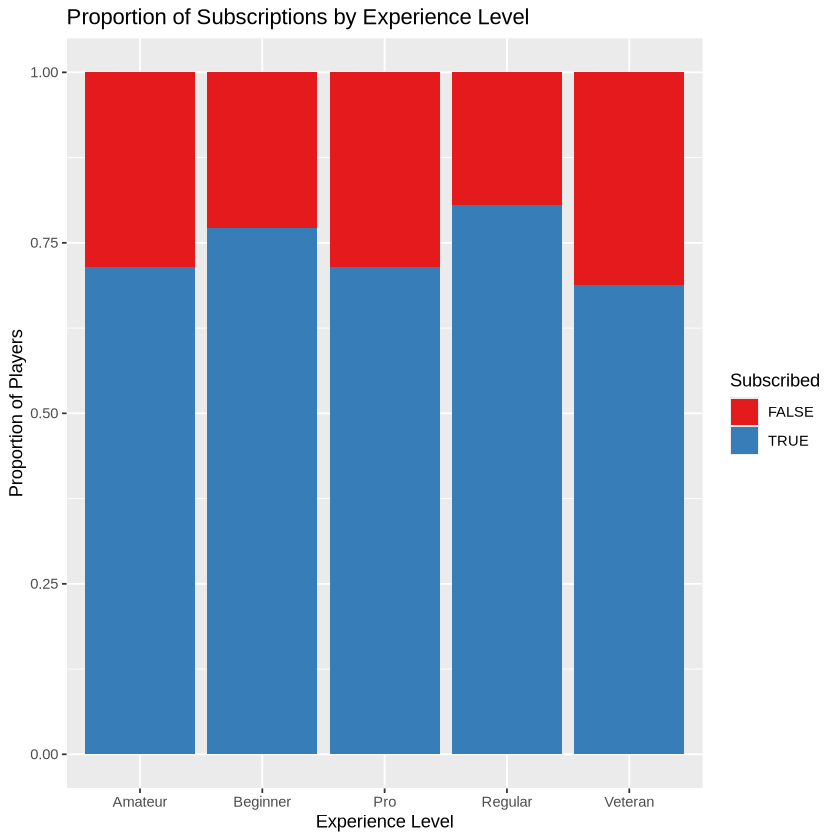

In [18]:
experience_prop <- ggplot(players_factor, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  scale_fill_brewer(palette = "Set1") +
  labs(
    title = "Proportion of Subscriptions by Experience Level",
    x = "Experience Level",
    y = "Proportion of Players",
    fill = "Subscribed"
  ) 

experience_prop


Finally, a histogram will be made for the distribution of ages of people who are subscribed.

$x
[1] "Age (years)"

$y
[1] "Number of Players"

$title
[1] "Age Distribution of Subscribed Players"

attr(,"class")
[1] "labels"

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


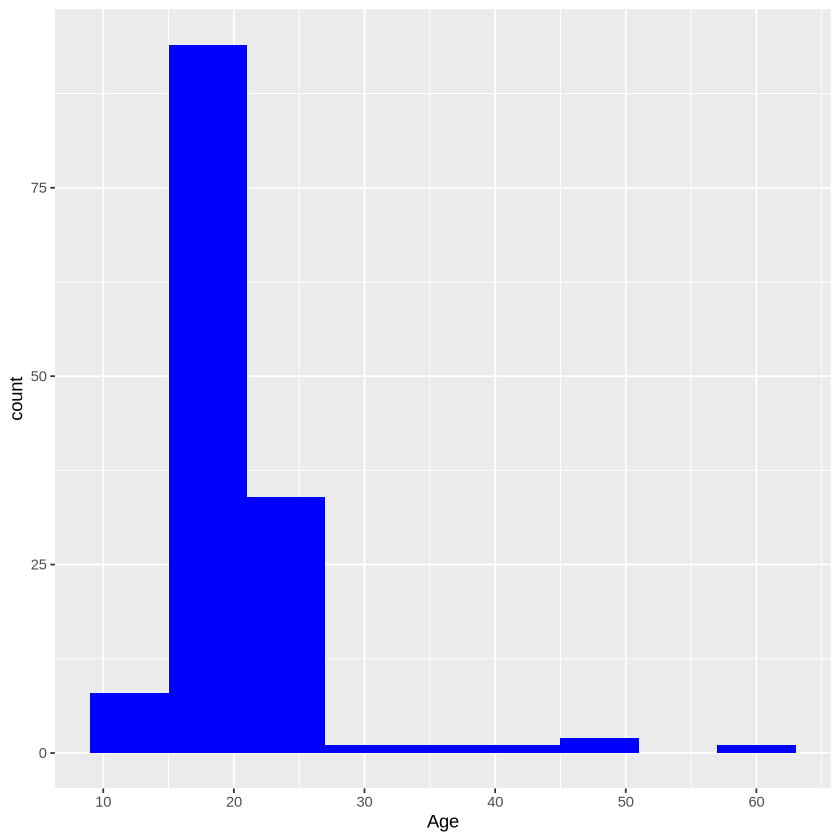

In [43]:
players_yes_factor <- players_factor |>
    filter(subscribe == "TRUE")

players_yes_plot <- ggplot(players_yes_factor, aes(x = Age)) +
  geom_histogram(fill = "Blue", 
                 binwidth = 6) +
  scale_x_continuous(n.breaks = 10)
  labs(title = "Age Distribution of Subscribed Players",
       x = "Age (years)",
       y = "Number of Players") 
  
players_yes_plot

Based on our surface level plots, we can note some interesting trends.

In **Plot 1**, it appears that players identifying as agender or "other" subscribe all the time, however this could be due to the lack of representation in the set. It appears that on the scale chosen, there is not really much of a difference among other gender identities, with all of them being very high, apart from the "prefer not to say" category.

In **Plot 2**, there seems to be no real trend in terms of subscription, with all numbers being quite high for all experiences. More processing will need to be done in order to assess whether a relationship exists.

Finally, in **Plot 3**, it appears that the majority of players are very young, being around university age or younger. This could give some insights into results from the other two plots, however more visualizations need to be done to truly establish this.

As of right now, it does not appear that there are very discernible relationships in the data, however with different visualizations and different combinations, there may still be hidden trends that have not yet been found. Additionally, it could also be the case that there simply is no way to predict who will subscribe to a newsletter based on the data available, which is something commonly present in research.

## 4. Methods and Plan